## Librerias

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\utils')
import gold_statistics
import null_values
import cardinalidad

import itertools

## Carga de datos

In [2]:
df = pd.read_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\process\\s10_teamstats.csv", index_col=False, parse_dates=["date"])

## Exploración del dataset tratado

In [3]:
df

,gameId,league,split,playoffs,date,game,patch,gamelength,blue_playerid,result,firstblood,firstdragon,blue_dragons,blue_elementaldrakes,blue_infernals,blue_mountains,blue_clouds,blue_oceans,blue_elders,firstherald,blue_heralds,firstbaron,blue_barons,firsttower,blue_towers,firstmidtower,firsttothreetowers,blue_inhibitors,red_playerid,red_dragons,red_elementaldrakes,red_infernals,red_mountains,red_clouds,red_oceans,red_elders,red_heralds,red_barons,red_towers,red_inhibitors,blue_totalgold,blue_earnedgold,blue_spentgold,blue_goldat10,blue_goldat15,red_totalgold,red_earnedgold,red_spentgold,red_goldat10,red_goldat15,blue_totalgold_diff,red_totalgold_diff,blue_earnedgold_diff,red_earnedgold_diff,blue_spentgold_diff,red_spentgold_diff,blue_gold_diffat10,red_gold_diffat10,blue_gold_diffat15,red_gold_diffat15
0,1241318,KeSPA,NaN,0,2020-01-03 07:33:00,1,9.24,2220,SANDBOX Gaming,1,0.0,0.0,2,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,8,0.0,0.0,1.0,T1,3,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0,4,0.0,68927,44907,62275.0,14615.0,21953.0,62709,38689,62025.0,14498.0,22778.0,6218,-6218,6218,-6218,250.0,-250.0,117.0,-117.0,-825.0,825.0
1,1241322,KeSPA,NaN,0,2020-01-03 09:00:00,2,9.24,2227,T1,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,2,1.0,0.0,0.0,SANDBOX Gaming,4,4.0,0.0,1.0,1.0,2.0,0.0,2.0,2,9,1.0,57283,33188,56575.0,14180.0,21714.0,72004,47909,63975.0,16194.0,27198.0,-14721,14721,-14721,14721,-7400.0,7400.0,-2014.0,2014.0,-5484.0,5484.0
2,1241324,KeSPA,NaN,0,2020-01-03 10:05:00,3,9.24,1711,T1,1,0.0,1.0,4,4.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1,1.0,10,1.0,1.0,2.0,SANDBOX Gaming,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,58078,39248,50660.0,15531.0,24882.0,42465,23635,40375.0,14849.0,22316.0,15613,-15613,15613,-15613,10285.0,-10285.0,682.0,-682.0,2566.0,-2566.0
3,1241328,KeSPA,NaN,0,2020-01-03 10:57:00,4,9.24,1999,T1,0,0.0,1.0,2,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,0.0,3,0.0,0.0,0.0,SANDBOX Gaming,3,3.0,0.0,0.0,3.0,0.0,0.0,1.0,2,9,1.0,50749,28979,48400.0,14313.0,22329.0,64845,43075,57400.0,15892.0,24800.0,-14096,14096,-14096,14096,-9000.0,9000.0,-1579.0,1579.0,-2471.0,2471.0
4,1241386,KeSPA,NaN,0,2020-01-04 05:33:00,1,9.24,1812,DRX,0,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1.0,4,0.0,0.0,0.0,Afreeca Freecs,4,4.0,0.0,1.0,1.0,2.0,0.0,0.0,2,8,1.0,48633,28773,47010.0,15388.0,24644.0,58837,38977,51785.0,16135.0,23767.0,-10204,10204,-10204,10204,-4775.0,4775.0,-747.0,747.0,877.0,-877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,1310259,EM,NaN,0,2020-08-18 20:25:00,1,10.16,2075,Racoon,1,0.0,1.0,4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1,1.0,11,1.0,1.0,5.0,SAMCLAN Esports Club,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3,0.0,64974,42429,57925.0,15437.0,25367.0,56098,33553,57108.0,15263.0,22918.0,8876,-8876,8876,-8876,817.0,-817.0,174.0,-174.0,2449.0,-2449.0
5145,1310260,EM,NaN,0,2020-08-18 20:27:00,1,10.16,2095,SINNERS Esports,1,0.0,0.0,2,2.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,3,1.0,11,1.0,1.0,4.0,Five Kings,4,4.0,1.0,1.0,0.0,2.0,0.0,0.0,0,1,0.0,70858,48113,65058.0,18545.0,28688.0,58726,35981,54775.0,16559.0,24468.0,12132,-12132,12132,-12132,10283.0,-10283.0,1986.0,-1986.0,4220.0,-4220.0
5146,1310262,EM,NaN,0,2020-08-18 20:53:00,1,10.16,2879,Team GamerLegion,1,1.0,0.0,4,4.0,0.0,3.0,0.0,1.0,0.0,1.0,2.0,0.0,2,1.0,10,1.0,1.0,2.0,Riddle Esports,3,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1,7,1.0,87236,56491,84670.0,14766.0,23862.0,82842,52097,79411.0,14861.0,23284.0,4394,-4394,4394,-4394,5259.0,-5259.0,-95.0,95.0,578.0,-578.0
5147,1320317,EM,NaN,0,2020-08-18 20:56:00,1,10.16,1874,G2 Arctic,1,0.0,0.0,2,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2,1.0,10,1.0,1.0,1.0,CR4ZY,2,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0,57694,37199,52925.0,16975.0,26145.0,45986,25491,45250.0,16091.0,24157.0,11708,-11708,11708,-11708,7675.0,-7675.0,884.0,-884.0,1988.0,-1988.0


In [4]:
df.shape

(5149, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   gameId                5148 non-null   object        
 1   league                5149 non-null   object        
 2   split                 3566 non-null   object        
 3   playoffs              5149 non-null   int64         
 4   date                  5149 non-null   datetime64[ns]
 5   game                  5149 non-null   int64         
 6   patch                 5149 non-null   float64       
 7   gamelength            5149 non-null   int64         
 8   blue_playerid         5149 non-null   object        
 9   result                5149 non-null   int64         
 10  firstblood            5148 non-null   float64       
 11  firstdragon           5095 non-null   float64       
 12  blue_dragons          5149 non-null   int64         
 13  blue_elementaldrak

In [6]:
df.describe(exclude=object).shape

(8, 55)

In [7]:
df.describe(include=object).shape

(4, 5)

Hemos reducido bastante el número de variables, quedandonos con las más relevantes o al menos las más útiles para el análisis que queremos hacer. Se siguen manteniendo los nulos pero ahora serán más fácilmente imputables. 

## Tratamiento de nulos

In [8]:
for i in df:
    a = df[i].isna().sum()
    if a > 0:
        print(f"La cantidad de nulos de la variable {i} es {a}")

La cantidad de nulos de la variable gameId es 1
La cantidad de nulos de la variable split es 1583
La cantidad de nulos de la variable firstblood es 1
La cantidad de nulos de la variable firstdragon es 54
La cantidad de nulos de la variable blue_elementaldrakes es 82
La cantidad de nulos de la variable blue_infernals es 82
La cantidad de nulos de la variable blue_mountains es 82
La cantidad de nulos de la variable blue_clouds es 82
La cantidad de nulos de la variable blue_oceans es 82
La cantidad de nulos de la variable blue_elders es 51
La cantidad de nulos de la variable firstherald es 51
La cantidad de nulos de la variable blue_heralds es 134
La cantidad de nulos de la variable firstbaron es 185
La cantidad de nulos de la variable firsttower es 30
La cantidad de nulos de la variable firstmidtower es 58
La cantidad de nulos de la variable firsttothreetowers es 51
La cantidad de nulos de la variable blue_inhibitors es 51
La cantidad de nulos de la variable red_elementaldrakes es 82
La 

Eliminando las dos columnas con nulos que no son relevates para el análisis

In [9]:
del df["gameId"]

In [10]:
del df["split"]

Para el resto, haremos haremos drop de los nulos al no ser un porcentaje muy representativo

In [11]:
df = df.dropna()

## Cardinalidad

In [12]:
cdn = cardinalidad.cardinalidad(df)

In [13]:
cdn  = cdn.reset_index()

Falta añadir el tipo de dato

In [14]:
tipo_dato = ["Categórico", "Binario", "Date", "Ordinal", "Ordinal", "Temporal", "Categótico", "Binario", "Binario", "Binario",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Binario", "Numérico", "Binario",
             "Numérico", "Binario", "Numérico", "Binario", "Binario", "Numérico", "Categórico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico",
             "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico", "Numérico"]

cdn["Tipo_dato"] = tipo_dato

In [15]:
cdn

,Columna,Total de únicos,Cardinalidad,Cardinalidad (%),Tipo_dato
0,league,23,0.004735,0.473543,Categórico
1,playoffs,2,0.000412,0.041178,Binario
2,date,4745,0.976940,97.694050,Date
3,game,5,0.001029,0.102944,Ordinal
4,patch,16,0.003294,0.329421,Ordinal
5,gamelength,1355,0.278979,27.897879,Temporal
6,blue_playerid,244,0.050237,5.023677,Categótico
7,result,2,0.000412,0.041178,Binario
8,firstblood,2,0.000412,0.041178,Binario
9,firstdragon,2,0.000412,0.041178,Binario


In [17]:
cdn.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\final\\cardinalidad.csv", index=False)

Ajustamos el tipo de dato a tipo de variable

In [602]:
binarios = cdn["Columna"][cdn["Tipo_dato"] == "Binario"]

In [603]:
df[binarios] = df[binarios].astype(bool)

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\1867139145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binarios] = df[binarios].astype(bool)


In [604]:
categoricos = cdn["Columna"][cdn["Tipo_dato"] == "Categórico"]

df[categoricos] = df[categoricos].astype(object)

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\1016299258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categoricos] = df[categoricos].astype(object)


In [605]:
oddinales = cdn["Columna"][cdn["Tipo_dato"] == "Ordinal"]

df[oddinales] = df[oddinales].astype(object)

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\590773132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[oddinales] = df[oddinales].astype(object)


In [606]:
df.dtypes

league                          object
playoffs                          bool
date                    datetime64[ns]
game                            object
patch                           object
gamelength                       int64
blue_playerid                   object
result                            bool
firstblood                        bool
firstdragon                       bool
blue_dragons                     int64
blue_elementaldrakes           float64
blue_infernals                 float64
blue_mountains                 float64
blue_clouds                    float64
blue_oceans                    float64
blue_elders                    float64
firstherald                       bool
blue_heralds                   float64
firstbaron                        bool
blue_barons                      int64
firsttower                        bool
blue_towers                      int64
firstmidtower                     bool
firsttothreetowers                bool
blue_inhibitors          

Por último, procedemos a realizar un mapa de correlaciones para observar como se relacionan las variables y hacernos tener una idea general de como se estructuran, además de guardar el dataframe en un csv ya que este será el que analicemos.

Text(0.5, 1.0, 'Correlation heatmap of the variables')

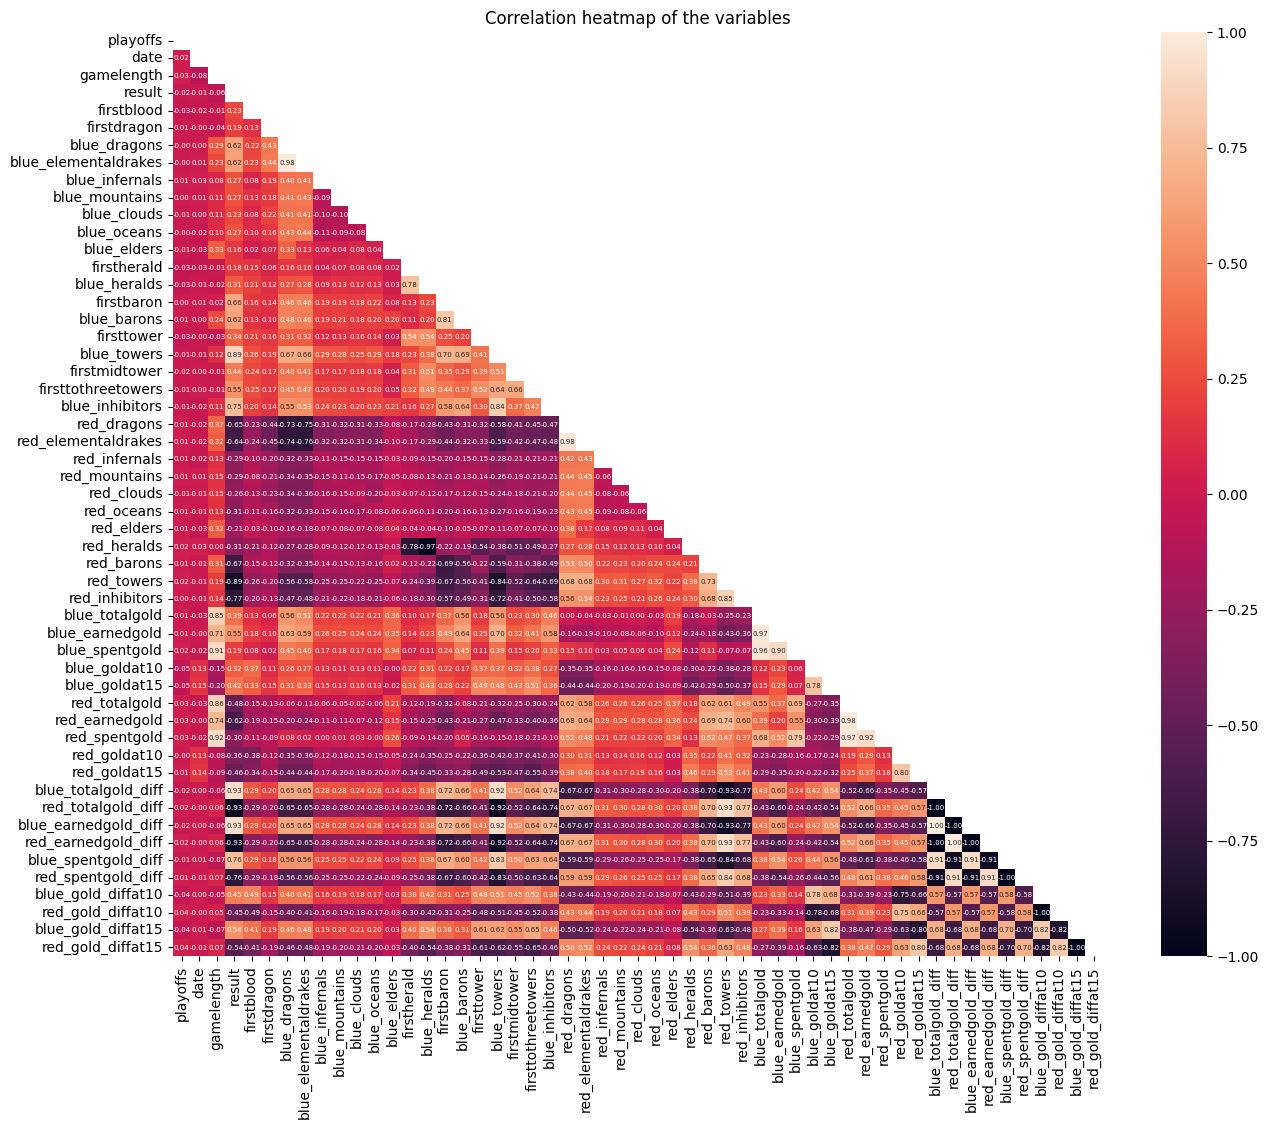

In [607]:
plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(df.select_dtypes(exclude="object").corr()))
ax = sns.heatmap(df.select_dtypes(exclude="object").corr(), mask=mask, annot=True, annot_kws={"fontsize":5}, fmt="0.2f")
plt.title("Correlation heatmap of the variables")

## Outliers

Solo trataremos los outliers de las estadísticas de oro, pues además de ser los que mas correlación tienen con la variable target, el resto son valores categóricos, y si son numéricos, o están muy limitados (o directamente limitados) por como funciona el juego, por lo tanto no hay demasiados outliers y con la gran cantidad de datos no afectarían en este caso.

In [608]:
out = df.columns[df.columns.str.contains("gold")]
out

Index(['blue_totalgold', 'blue_earnedgold', 'blue_spentgold', 'blue_goldat10',
       'blue_goldat15', 'red_totalgold', 'red_earnedgold', 'red_spentgold',
       'red_goldat10', 'red_goldat15', 'blue_totalgold_diff',
       'red_totalgold_diff', 'blue_earnedgold_diff', 'red_earnedgold_diff',
       'blue_spentgold_diff', 'red_spentgold_diff', 'blue_gold_diffat10',
       'red_gold_diffat10', 'blue_gold_diffat15', 'red_gold_diffat15'],
      dtype='object')

oro total azul

<Axes: ylabel='blue_totalgold'>

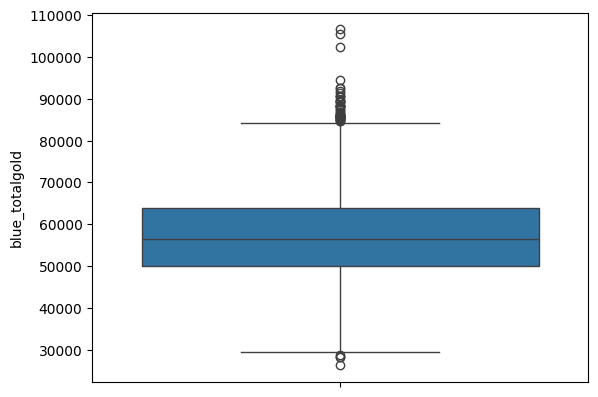

In [609]:
sns.boxplot(df["blue_totalgold"])

In [610]:
totalgold_outliers = df[(df["blue_totalgold"] > 100000) | (df["blue_totalgold"] < 30000)].index.to_list()
totalgold_outliers

[354, 837, 970, 1271, 1528, 2420, 4251, 4408, 4804]

Viendo que hay muchos outliers y la mayoría se encuentran cerca de los máximos. Para no poder muchos datos solo eliminaremos los que están por debajo del mínimo y lo que superan los 100000

In [611]:
df = df.drop([354, 837, 970, 1271, 1528, 2420, 4251, 4408, 4804])

Oro ganado azul

In [612]:
out

Index(['blue_totalgold', 'blue_earnedgold', 'blue_spentgold', 'blue_goldat10',
       'blue_goldat15', 'red_totalgold', 'red_earnedgold', 'red_spentgold',
       'red_goldat10', 'red_goldat15', 'blue_totalgold_diff',
       'red_totalgold_diff', 'blue_earnedgold_diff', 'red_earnedgold_diff',
       'blue_spentgold_diff', 'red_spentgold_diff', 'blue_gold_diffat10',
       'red_gold_diffat10', 'blue_gold_diffat15', 'red_gold_diffat15'],
      dtype='object')

<Axes: xlabel='blue_earnedgold'>

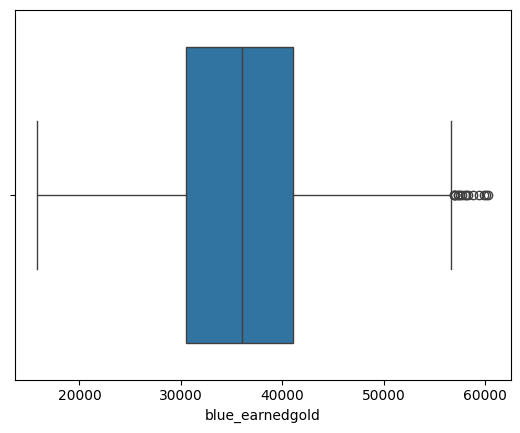

In [613]:
sns.boxplot(df, x="blue_earnedgold")

In [614]:
df["red_earnedgold"].quantile([0.25,0.75])

0.25    28913.75
0.75    41140.25
Name: red_earnedgold, dtype: float64

In [615]:
earned_bluemax = 41140.25 + (41140.25 - 28913.75)*1.5

In [616]:
earned_blueout = df[df["blue_earnedgold"] > earned_bluemax].index.to_list()

In [617]:
df = df.drop(earned_blueout)

In [618]:
out

Index(['blue_totalgold', 'blue_earnedgold', 'blue_spentgold', 'blue_goldat10',
       'blue_goldat15', 'red_totalgold', 'red_earnedgold', 'red_spentgold',
       'red_goldat10', 'red_goldat15', 'blue_totalgold_diff',
       'red_totalgold_diff', 'blue_earnedgold_diff', 'red_earnedgold_diff',
       'blue_spentgold_diff', 'red_spentgold_diff', 'blue_gold_diffat10',
       'red_gold_diffat10', 'blue_gold_diffat15', 'red_gold_diffat15'],
      dtype='object')

oro gastado azul

<Axes: xlabel='blue_spentgold'>

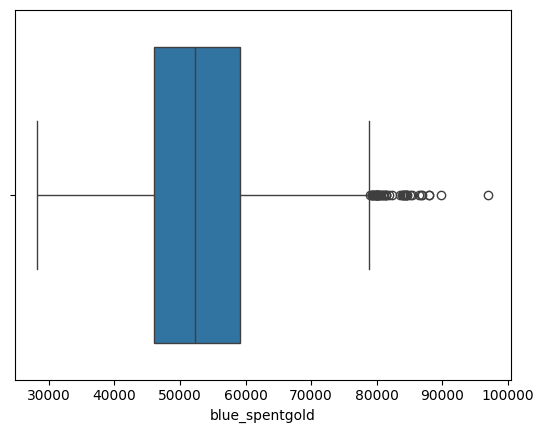

In [619]:
sns.boxplot(df, x="blue_spentgold")

In [620]:
spent_blueout = df[df["blue_spentgold"] > 90000].index.to_list()
df = df.drop(spent_blueout)

In [621]:
out

Index(['blue_totalgold', 'blue_earnedgold', 'blue_spentgold', 'blue_goldat10',
       'blue_goldat15', 'red_totalgold', 'red_earnedgold', 'red_spentgold',
       'red_goldat10', 'red_goldat15', 'blue_totalgold_diff',
       'red_totalgold_diff', 'blue_earnedgold_diff', 'red_earnedgold_diff',
       'blue_spentgold_diff', 'red_spentgold_diff', 'blue_gold_diffat10',
       'red_gold_diffat10', 'blue_gold_diffat15', 'red_gold_diffat15'],
      dtype='object')

Rojo gastado total

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\2257675768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_totalgold", palette="Reds")


<Axes: xlabel='red_totalgold'>

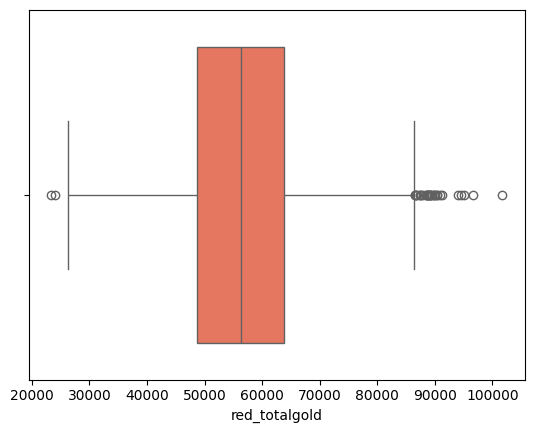

In [622]:
sns.boxplot(df, x="red_totalgold", palette="Reds")

In [623]:
df["red_totalgold"].quantile([0.25,0.75])

0.25    48678.75
0.75    63848.25
Name: red_totalgold, dtype: float64

In [624]:
red_min1= 48677 - 1.5*(63832.5-49677)

In [625]:
redtotal = df[(df["red_totalgold"] > 100000) | (df["red_totalgold"] < red_min1)].index.to_list()
df = df.drop(redtotal)

Oro rojo ganado

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\2933943475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_earnedgold", palette="Reds")


<Axes: xlabel='red_earnedgold'>

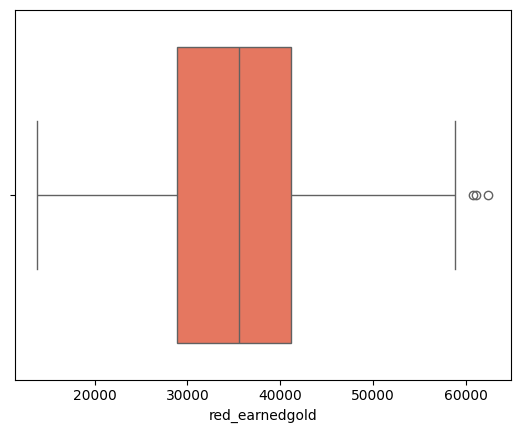

In [626]:
sns.boxplot(df, x="red_earnedgold", palette="Reds")

In [627]:
df["red_earnedgold"].quantile([0.25,0.75])

0.25    28923.75
0.75    41126.25
Name: red_earnedgold, dtype: float64

In [628]:
red_max = 41120 + 1.5*(41120-28902)
red_earnedout = df[df["red_earnedgold"] > red_max].index.tolist()
df = df.drop(red_earnedout)

Rojo gastado

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\2762802145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_spentgold", palette="Reds")


<Axes: xlabel='red_spentgold'>

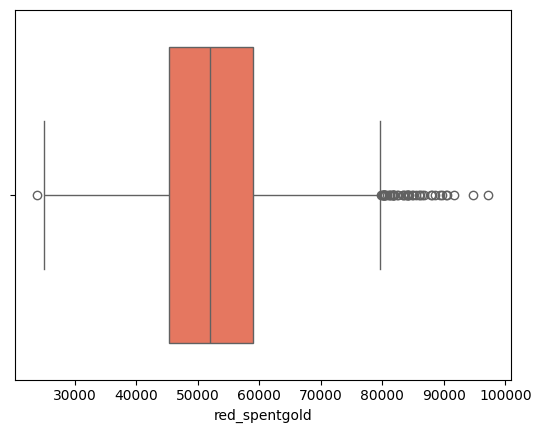

In [629]:
sns.boxplot(df, x="red_spentgold", palette="Reds")

In [630]:
red_spentouts = df[df["red_spentgold"] > 95000].index.to_list()
df = df.drop(red_spentouts)

In [631]:
out

Index(['blue_totalgold', 'blue_earnedgold', 'blue_spentgold', 'blue_goldat10',
       'blue_goldat15', 'red_totalgold', 'red_earnedgold', 'red_spentgold',
       'red_goldat10', 'red_goldat15', 'blue_totalgold_diff',
       'red_totalgold_diff', 'blue_earnedgold_diff', 'red_earnedgold_diff',
       'blue_spentgold_diff', 'red_spentgold_diff', 'blue_gold_diffat10',
       'red_gold_diffat10', 'blue_gold_diffat15', 'red_gold_diffat15'],
      dtype='object')

Total gold diff

<Axes: xlabel='blue_totalgold_diff'>

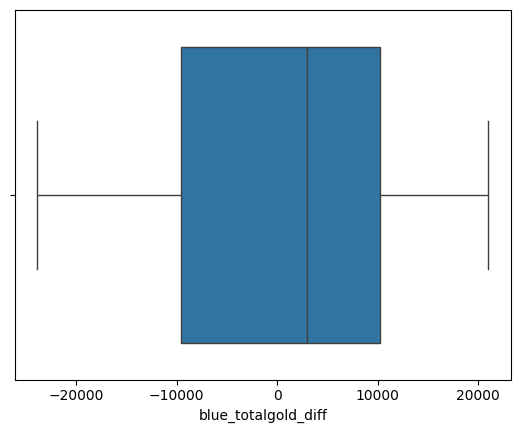

In [632]:
sns.boxplot(df, x="blue_totalgold_diff")

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\13470251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_totalgold_diff", palette="Reds")


<Axes: xlabel='red_totalgold_diff'>

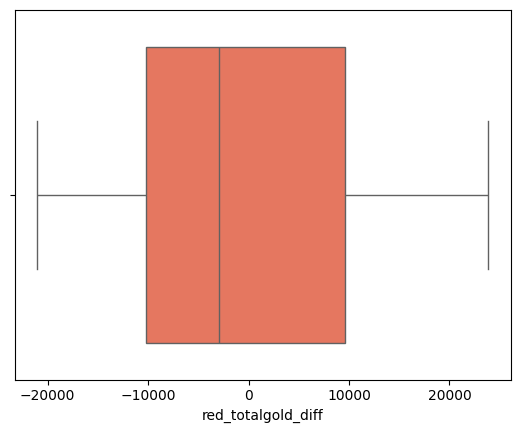

In [633]:
sns.boxplot(df, x="red_totalgold_diff", palette="Reds")

earned gold diff

<Axes: xlabel='blue_spentgold_diff'>

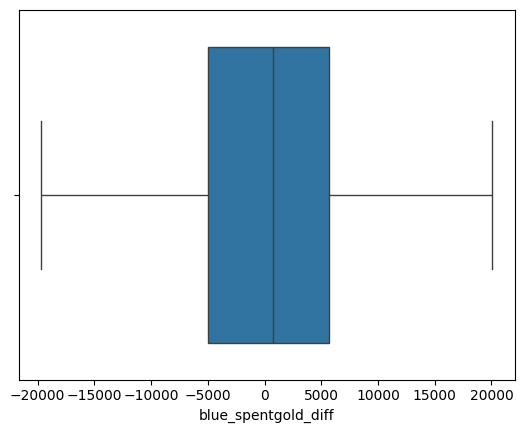

In [634]:
sns.boxplot(df, x="blue_spentgold_diff")

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\118747804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_spentgold_diff", palette="Reds")


<Axes: xlabel='red_spentgold_diff'>

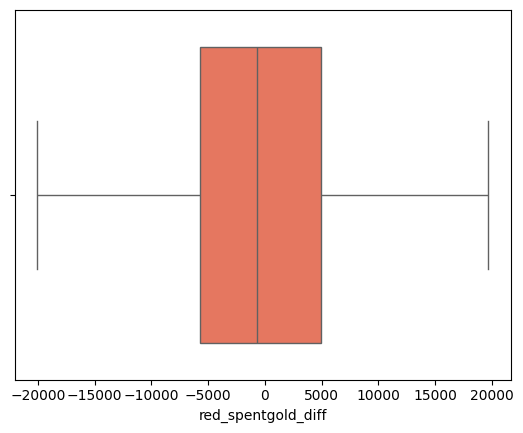

In [635]:
sns.boxplot(df, x="red_spentgold_diff", palette="Reds")

Diferencia de oro gastado 

<Axes: xlabel='blue_spentgold_diff'>

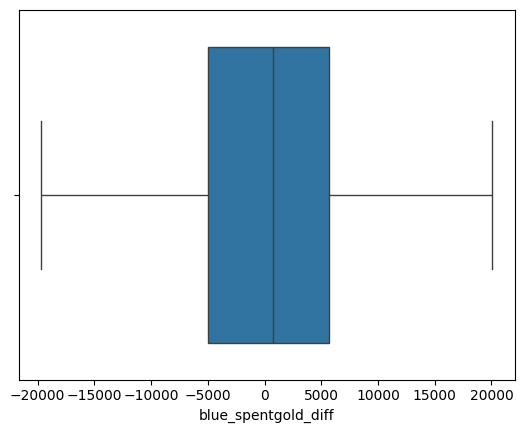

In [636]:
sns.boxplot(df, x="blue_spentgold_diff")

C:\Users\camil\AppData\Local\Temp\ipykernel_7016\118747804.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="red_spentgold_diff", palette="Reds")


<Axes: xlabel='red_spentgold_diff'>

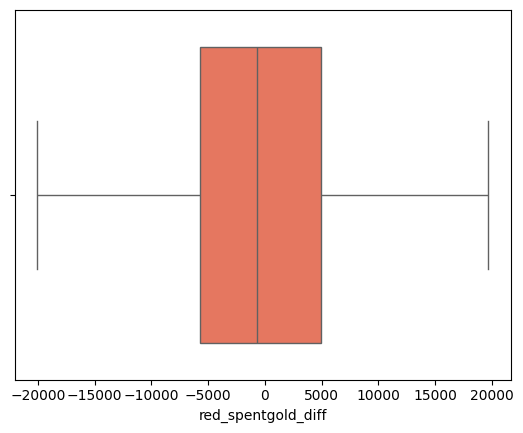

In [637]:
sns.boxplot(df, x="red_spentgold_diff", palette="Reds")

gamelenght

<Axes: xlabel='gamelength'>

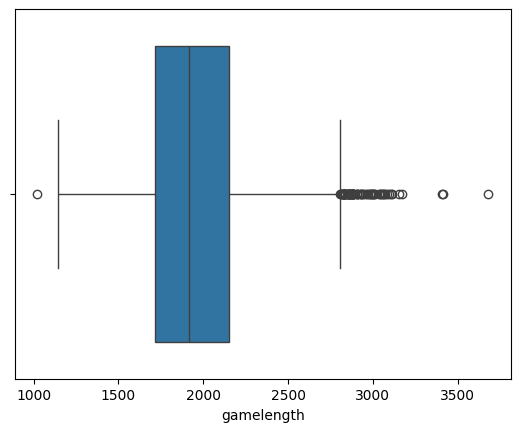

In [638]:
sns.boxplot(x = df["gamelength"])

In [639]:
df["gamelength"].quantile([0.25,0.75])

0.25    1718.0
0.75    2153.0
Name: gamelength, dtype: float64

In [640]:
min_gl = 1719 - 1.5*(2153-1718)

In [641]:
gl = df[(df["gamelength"] > 3300) | (df["gamelength"] < min_gl)].index.to_list()
df = df.drop(gl)

Parche

In [642]:
df["patch"].value_counts()

patch
10.06    538
10.12    492
10.13    487
10.15    482
10.14    470
10.07    397
10.11    375
10.04    315
10.05    309
10.02    278
10.03    272
10.16    133
10.08    116
10.1      91
10.01     67
9.24      10
Name: count, dtype: int64

In [643]:
patch_pre = df[df["patch"] == 9.24].index.to_list()

In [644]:
df = df.drop(patch_pre)

## Final

In [645]:
df.to_csv("C:\\Users\\camil\\OneDrive\\Documentos\\GitHub\\GITHUb\\EDA_DS\\Src\\Data\\final\\s10_final.csv", index=False)